In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
import scipy
import csv

from src.poisson_process import NHPoissonProcess
from src.mcmc import PoissonMCMC
from src.visualisation import *
from parameters.params import Params
from src.densities import gpd_quantile
from src.rhat_infinity import *


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from IPython.display import display

# Parameters loading


In [3]:
poisson_params_directory = "parameters/poisson_simu/"

poisson_config = "sharkey_poisson_config"
# poisson_config = "gpd_config"
# poisson_config = "tony_poisson_config"
# poisson_config = "negative_xi_config"

poisson_params = Params(poisson_params_directory + poisson_config + ".json")

mcmc_params_directory = "parameters/mcmc/"
mcmc_configs = ["Config1.json", "Config3.json", "Config4.json"]
# mcmc_configs = ["GPDConfig1.json", "GPDConfig2.json"]


# mcmc_configs = []
# for filename in os.listdir(mcmc_params_directory):
#     if "json" in filename:
#         mcmc_configs.append(filename)

estimator = "mean"


# Data simulation

Poisson process parameter: (mu = 80, sigma = 15, xi = 0.05)
Orthogonal version: (r = 306.70, nu = 13.12, xi = 0.05)
Expected number of points: 306.70
Number of generated points: 310
Min: 30.064
Max: 112.402

Estimation of quantiles 1/306, 1/613 and 1/920 
Theoretical values of quantiles: 112.871, 124.610, 131.667


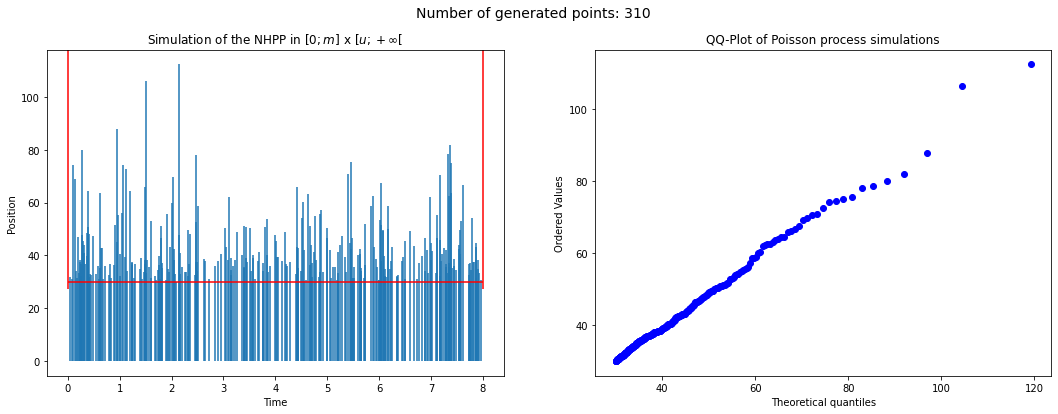

In [4]:
PP = NHPoissonProcess(mu=poisson_params.mu, sig=poisson_params.sigma, xi=poisson_params.xi,
                      u=poisson_params.u, m=poisson_params.m)

lam_obs = PP.get_measure()
n_obs = PP.gen_number_points()[0]

obs = PP.gen_positions(n_obs=n_obs)
times = PP.gen_time_events(n_obs=n_obs)

pp_params = PP.get_parameters()
print("Poisson process parameter: (mu = {}, sigma = {}, xi = {})".format(pp_params[2],
                                                                         pp_params[3],
                                                                         pp_params[4]))
ortho_params = PP.get_orthogonal_reparam()
print("Orthogonal version: (r = {:.2f}, nu = {:.2f}, xi = {})".format(ortho_params[0],
                                                                      ortho_params[1],
                                                                      ortho_params[2]))
print("Expected number of points: {:.2f}".format(lam_obs))
print("Number of generated points:", n_obs)
print("Min: {:.3f}".format(np.min(obs)))
print("Max: {:.3f}".format(np.max(obs)))

quantiles = (1/lam_obs, 1/(2*lam_obs), 1/(3*lam_obs))
print("\nEstimation of quantiles 1/{}, 1/{} and 1/{} ".format(int(lam_obs), int(2*lam_obs), int(3*lam_obs)))
sig_tilde = pp_params[3]+pp_params[4]*(pp_params[0]-pp_params[2])
real_q1 = gpd_quantile(prob=quantiles[0], mu=pp_params[0], sig=sig_tilde, xi=pp_params[4])
real_q2 = gpd_quantile(prob=quantiles[1], mu=pp_params[0], sig=sig_tilde, xi=pp_params[4])
real_q3 = gpd_quantile(prob=quantiles[2], mu=pp_params[0], sig=sig_tilde, xi=pp_params[4])
print("Theoretical values of quantiles: {:.3f}, {:.3f}, {:.3f}".format(real_q1, real_q2, real_q3))

PP.plot_simulation(times=times, positions=obs)


# MCMC


Config file:  Config1.json
Original param.

Choice of m = 8 for MCMC


/home/tmoins/.local/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/tmoins/.local/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/tmoins/.local/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),



 Summary:


/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)


Multivariate R-hat-infinity on all dependence directions: 2.337 (threshold: 1.043)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,r_threshold,r_hat_infty
mu_m,78.996,7.468,69.906,92.584,2.563,1.936,8.0,22.0,1.42,1.031,2.014
sig_m,16.073,4.480,9.982,22.799,2.053,1.551,6.0,16.0,1.85,1.031,4.110
xi,0.094,0.145,-0.087,0.266,0.059,0.044,6.0,12.0,1.95,1.031,3.724


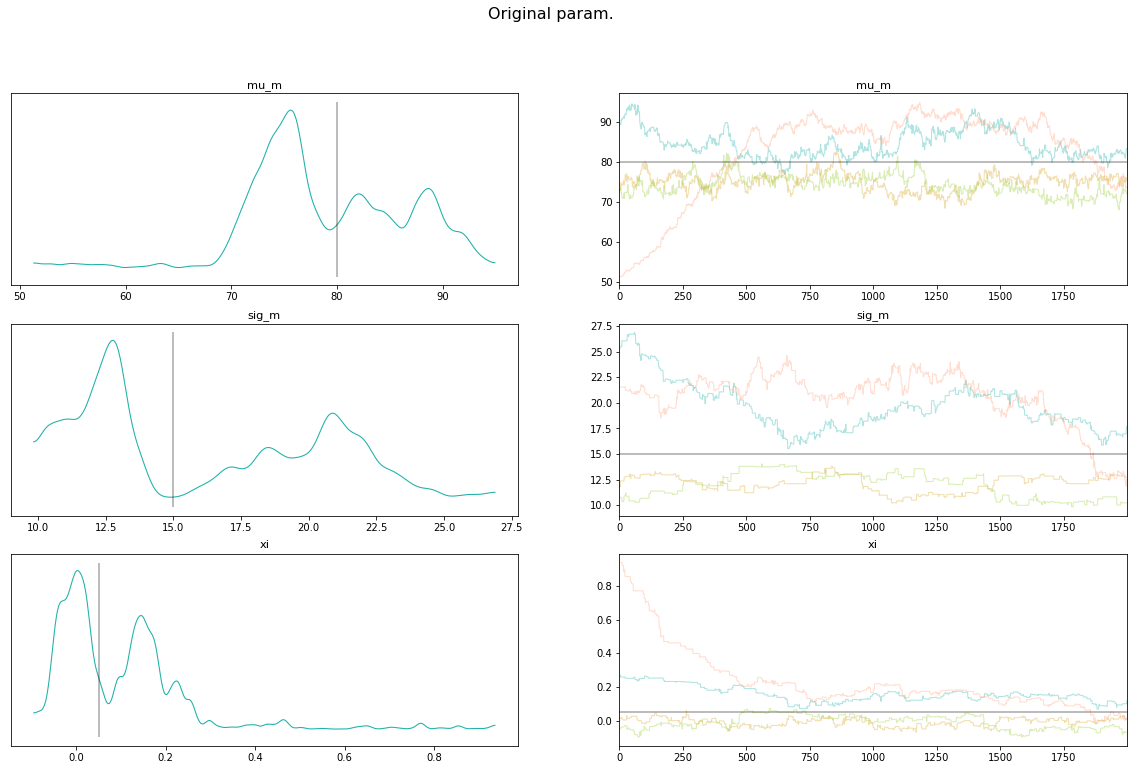


Config file:  Config3.json
m in [m1,m2]

Choice of m = 327 for MCMC


/home/tmoins/.local/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/tmoins/.local/lib/python3.8/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),



 Summary:
Multivariate R-hat-infinity on all dependence directions: 1.007 (threshold: 1.043)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,r_threshold,r_hat_infty
mu_m,76.576,3.845,69.800,83.802,0.111,0.079,1256.0,1939.0,1.0,1.031,1.004
sig_m,13.293,2.330,9.464,17.630,0.097,0.069,582.0,1028.0,1.0,1.031,1.006
xi,0.019,0.057,-0.077,0.135,0.003,0.002,405.0,635.0,1.0,1.031,1.007


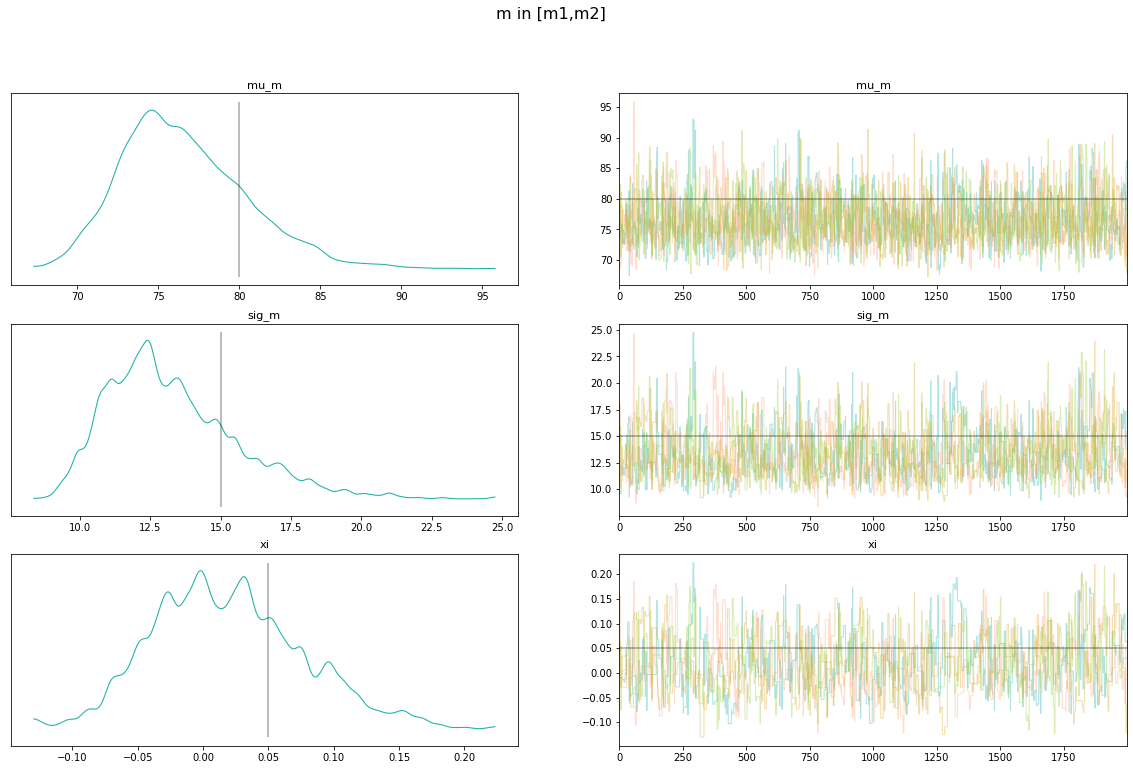


Config file:  Config4.json
Orthogonal param.

Choice of m = 8 for MCMC

 Summary:


/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)


Multivariate R-hat-infinity on all dependence directions: 1.010 (threshold: 1.043)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,r_threshold,r_hat_infty
r,310.753,17.979,278.945,346.225,0.584,0.415,976.0,849.0,1.01,1.031,1.010
nu,12.428,0.717,11.143,13.843,0.023,0.016,966.0,882.0,1.00,1.031,1.006
xi,0.018,0.058,-0.078,0.134,0.002,0.001,1229.0,1401.0,1.00,1.031,1.005


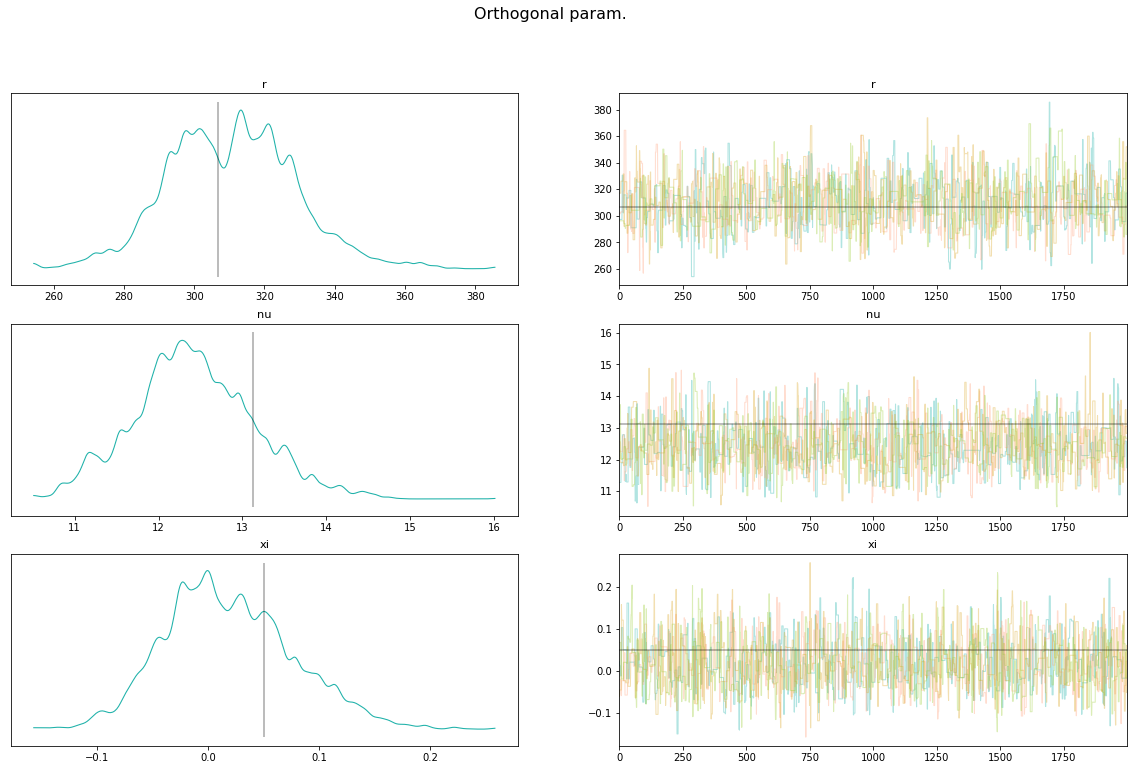

In [5]:
traces = []
traces_orthogonal = []
names = []
names_orthogonal = []


for filename in mcmc_configs:
    print("\nConfig file: ", filename)
    mcmc_params = Params(mcmc_params_directory + filename)
    print(mcmc_params.name)
    print("")
    
    nb_dim = len(mcmc_params.priors)
    priors = [mcmc_params.priors["p1"],
              mcmc_params.priors["p2"]]

    if nb_dim == 3:
        priors.append(mcmc_params.priors["p3"])
    
        if mcmc_params.init_p1_by_u:
            init_val = n_obs if mcmc_params.orthogonal_param else poisson_params.u
            priors[2] = priors[2].replace("u", str(init_val))

    MCMC = PoissonMCMC(priors=priors, step_method=mcmc_params.step_method, niter=mcmc_params.niter,
                       obs=obs, u=poisson_params.u, m=poisson_params.m, quantiles=quantiles,
                       orthogonal_param=mcmc_params.orthogonal_param)
    if mcmc_params.update_m != "":
        MCMC.update_m(update_arg=mcmc_params.update_m, xi=poisson_params.xi)
    print("Choice of m = {} for MCMC".format(MCMC.m))

    trace = MCMC.run(verbose=False)

    names.append(mcmc_params.name)
    traces.append(trace)
    
    print("\n Summary:")
    if MCMC.orthogonal_param:
        if nb_dim == 3:
            real_values = ortho_params[0:3]
            var_names = ["r", "nu", "xi"]
        else:
            real_values = ortho_params[1:3]
            var_names = ["nu", "xi"]
        
    else:
        if nb_dim == 3:
            real_values = pp_params[2:5]
            var_names = ["mu_m", "sig_m", "xi"]
        else:
            real_values = pp_params[3:5]
            var_names = ["sig_m", "xi"]
            
    display(localrhat_summary(data=trace, var_names = var_names))
    plot_trace(trace, var_names = var_names, title = mcmc_params.name, real_value = real_values)

    plt.show()

    

## Autocorrelations, ESS, and $\hat{R}(x)$ on parameters

/home/tmoins/Documents/GEV_prior/src/rhat_infinity.py:26: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((n - 1) / n + between_var / within_var)


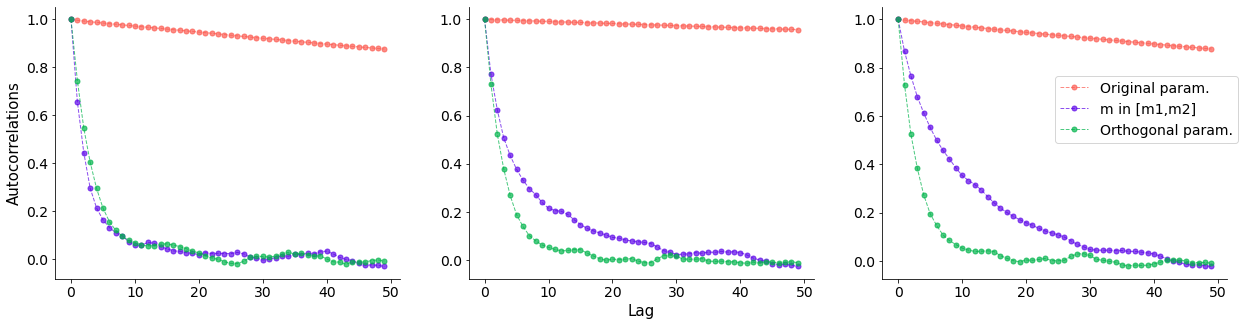

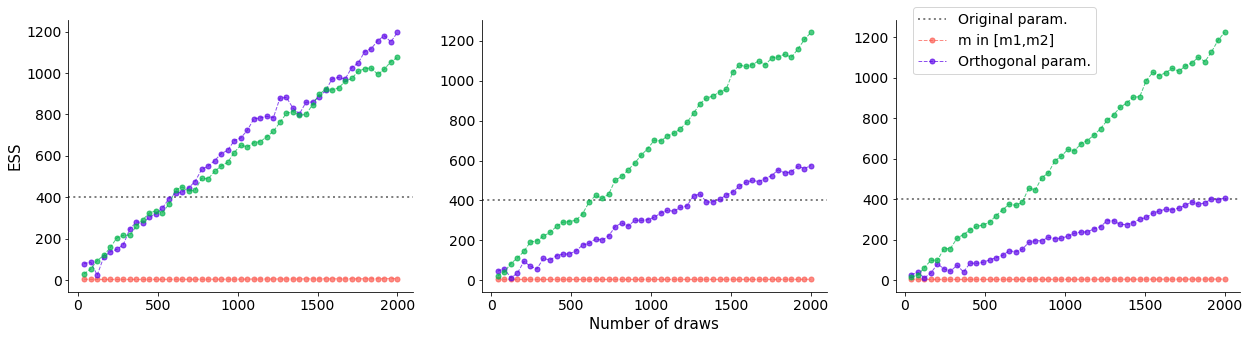

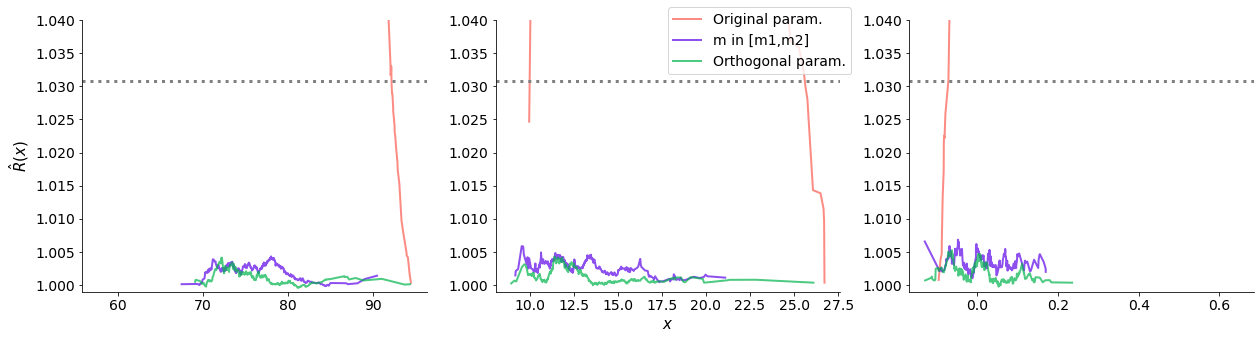

In [11]:
if nb_dim == 3:
    real_values = pp_params[2:5]
    var_names = ["mu_m", "sig_m", "xi"]
else:
    real_values = pp_params[3:5]
    var_names = ["sig_m", "xi"]
    
    
plot_autocorr(traces=traces, labels=names, var_names = var_names)
plot_ess(traces=traces, labels=names, var_names = var_names)
plot_r_hat_x(traces=traces, labels=names, var_names = var_names, ymax=1.0)
plt.show()